# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Abiaz Fazel Maula Sandy
- **Email:** abiazfazel.solo@gmail.com
- **ID Dicoding:** abiazfazel

## Menentukan Pertanyaan Bisnis

- Apakah ada peningkatan peminjaman sepeda dari waktu ke waktu, dan bagaimana peningkatannya?
- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("dataset/day.csv")
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
62,63,2011-03-04,1,0,3,0,5,1,2,0.261667,0.255679,0.610417,0.203346,214,1730,1944
276,277,2011-10-04,4,0,10,0,2,1,1,0.484167,0.472858,0.710000,0.205854,486,3970,4456
200,201,2011-07-20,3,0,7,0,3,1,1,0.768333,0.746850,0.707083,0.113817,644,3688,4332
94,95,2011-04-05,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795
217,218,2011-08-06,3,0,8,0,6,0,2,0.716667,0.676154,0.755000,0.228250,1521,2773,4294


In [6]:
hour_df = pd.read_csv("dataset/hour.csv")
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5425,5426,2011-08-18,3,0,8,23,0,4,1,2,0.70,0.6667,0.74,0.1343,20,94,114
14165,14166,2012-08-18,3,1,8,10,0,6,0,1,0.70,0.6515,0.54,0.1642,166,314,480
6598,6599,2011-10-07,4,0,10,12,0,5,1,1,0.60,0.6212,0.53,0.0000,61,174,235
16764,16765,2012-12-06,4,1,12,7,0,4,1,1,0.22,0.2121,0.51,0.2985,8,381,389
947,948,2011-02-12,1,0,2,2,0,6,0,1,0.14,0.2121,0.80,0.0000,2,13,15


**Insight:**
- Dataset berhasil didapatkan

### Assessing Data

Pengecekan informasi tabel `day.csv`

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pengecekan informasi tabel `hour.csv`

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pengecekan nilai kosong dengan `isnull()`

In [8]:
print("Dataset day.csv: ")
print(day_df.isnull().values.any())
print("Dataset hour.csv: ")
print(hour_df.isnull().values.any())

Dataset day.csv: 
False
Dataset hour.csv: 
False


**Insight**
- Dataset tidak memiliki kolom kosong.

Pengecekan duplicated columns

In [10]:
print("Dataset day.csv: ")
print(day_df.duplicated().values.any())
print("Dataset hour.csv: ")
print(hour_df.duplicated().values.any())

Dataset day.csv: 
False
Dataset hour.csv: 
False


**Insight:**
- Tidak ada kolom terduplikasi

#### Periksa outlier (nilai yang berbeda sangat jauh dari rata-rata) pada kolom weathersit, registered, casual, dan cnt

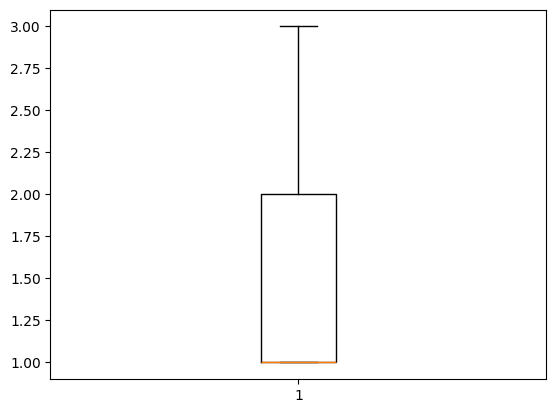

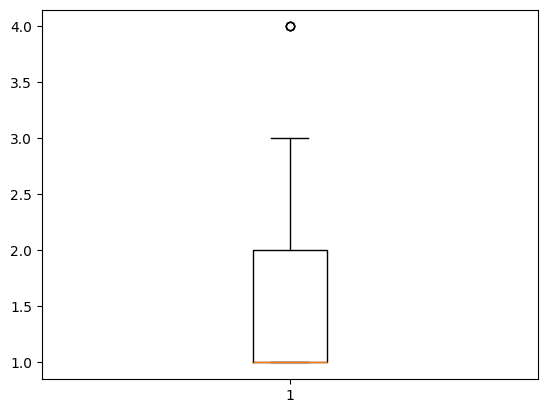

In [13]:
plt.boxplot(day_df['weathersit'])
plt.show()
plt.boxplot(hour_df['weathersit'])
plt.show()

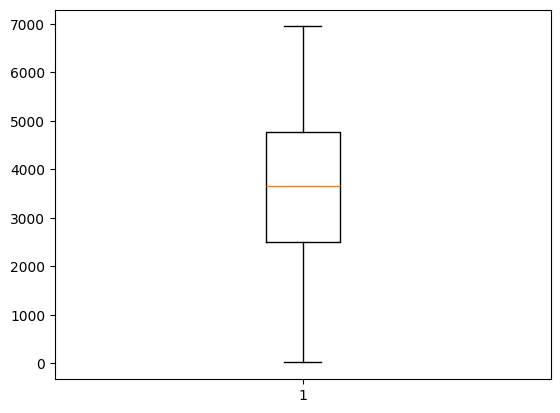

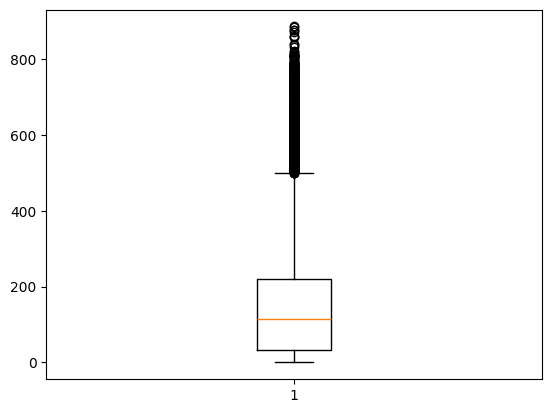

In [14]:
plt.boxplot(day_df['registered'])
plt.show()
plt.boxplot(hour_df['registered'])
plt.show()

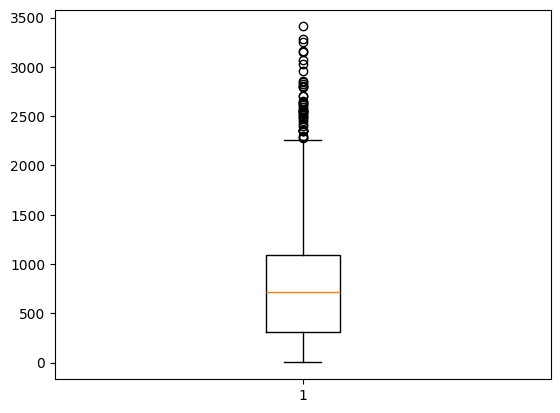

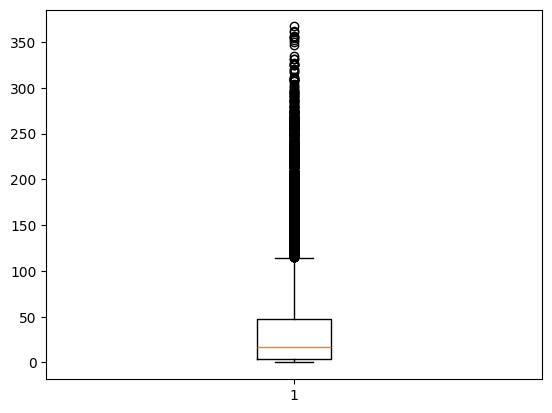

In [16]:
plt.boxplot(day_df['casual'])
plt.show()
plt.boxplot(hour_df['casual'])
plt.show()

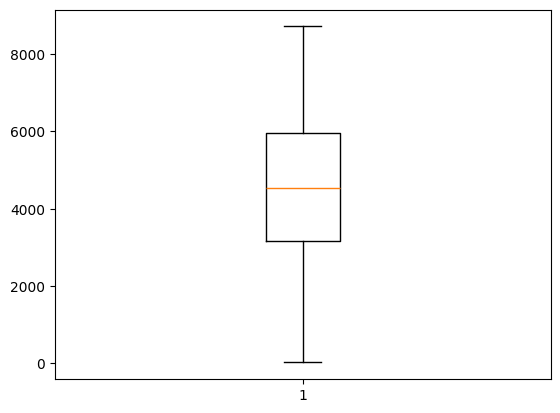

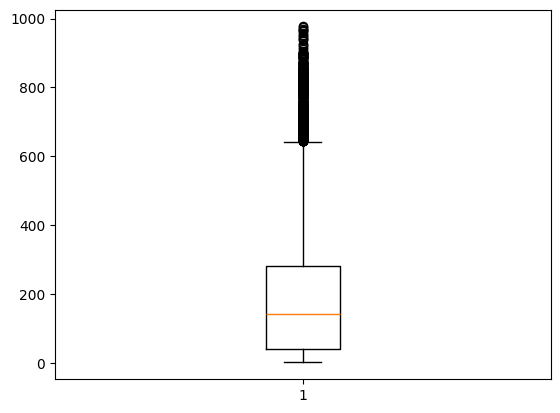

In [17]:
plt.boxplot(day_df['cnt'])
plt.show()
plt.boxplot(hour_df['cnt'])
plt.show()

**Insight**
- Data bebas dari outlier

### Cleaning Data

Membersihkan data tidak diperlukan karena data tidak memiliki missing values, duplicated values, maupun outlier.

## Exploratory Data Analysis (EDA)

### Explore `day_df` dan `hour_df`

In [18]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [19]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Tabel jumlah peminjam sepeda dari waktu ke waktu

In [20]:
# Mengonversi kolom dteday ke dalam tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengelompokkan data berdasarkan tanggal dan menghitung total peminjaman (cnt)
time_series_df = day_df.groupby('dteday')['cnt'].sum().reset_index()

# Mengganti nama kolom
time_series_df.columns = ['Date', 'Total Bike Rentals']

# Menampilkan tabel perkembangan peminjaman sepeda
print(time_series_df)


          Date  Total Bike Rentals
0   2011-01-01                 985
1   2011-01-02                 801
2   2011-01-03                1349
3   2011-01-04                1562
4   2011-01-05                1600
..         ...                 ...
726 2012-12-27                2114
727 2012-12-28                3095
728 2012-12-29                1341
729 2012-12-30                1796
730 2012-12-31                2729

[731 rows x 2 columns]


**Insight:**
- Dari tabel di atas kita dapat melihat bahwa ada peningkatan jumlah penyewaan sepeda dari waktu ke waktu. Yang awalnya ada di kisaran 1000 kemudian meningkat hingga menyentuh 3000.

Tabel pengaruh cuaca terhadap peminjaman sepeda

In [44]:
# Menambahkan label cuaca sesuai kategori yang diberikan
weather_labels = {
    1: 'Partly Cloudy',
    2: 'Mist + Cloudy',
    3: 'Light Rain / Light Snow',
    4: 'Heavy Rain'
}

# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung rata-rata peminjaman sepeda
weather_avg = day_df.groupby('weathersit')['cnt'].mean()

# Membuat DataFrame baru yang mencakup semua kategori cuaca
weather_avg_complete = pd.DataFrame({
    'Weather Condition': ['Partly Cloudy', 'Mist + Cloudy', 'Light Rain / Light Snow', 'Heavy Rain'],
    'Average Bike Rentals': [weather_avg.get(i, 0) for i in range(1, 5)]
})

# Menampilkan tabel
print(weather_avg_complete)


         Weather Condition  Average Bike Rentals
0            Partly Cloudy           4876.786177
1            Mist + Cloudy           4035.862348
2  Light Rain / Light Snow           1803.285714
3               Heavy Rain              0.000000


**Insight:**
- Peminjaman sepeda paling banyak pada cuaca cerah, kemudian diikuti sedikit kabut dan berawan, hujan ringan, dan pada hujan deras tidak ada peminjam sama sekali.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada peningkatan peminjaman sepeda dari waktu ke waktu, dan bagaimana peningkatannya?

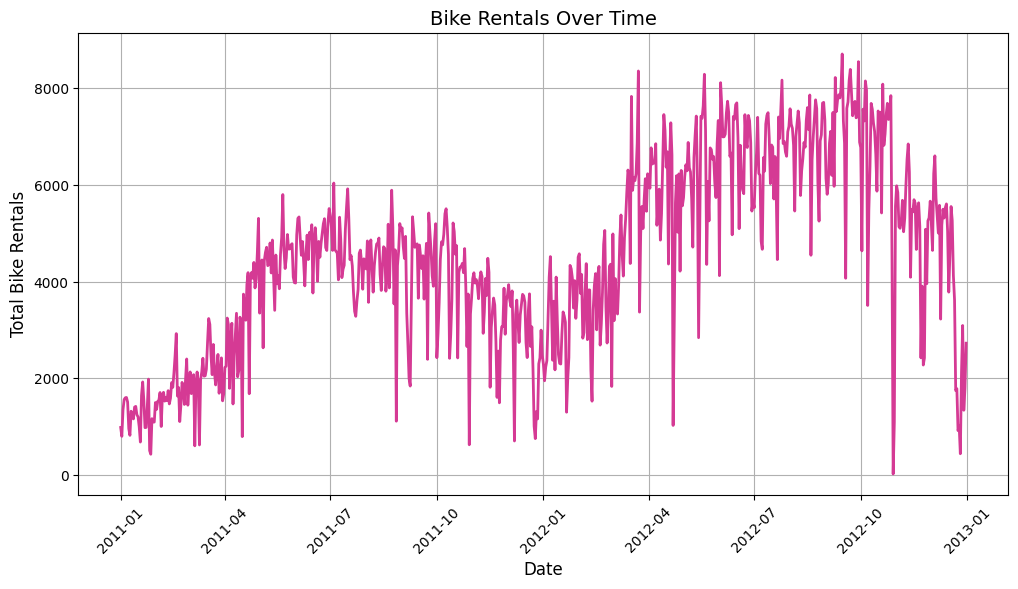

In [34]:
# Membuat line chart untuk perkembangan peminjaman sepeda dari waktu ke waktu
plt.figure(figsize=(12, 6))
plt.plot(time_series_df['Date'], time_series_df['Total Bike Rentals'], color='#D53A94', linewidth=2)

# Menambahkan judul dan label sumbu
plt.title('Bike Rentals Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)

# Memutar label tanggal agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menambahkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()


**Insight:**
- Pada line chart di atas, terlihat bahwa peminjaman sepeda terus mengalami peningkatan yang puncaknya ada di sekitar bulan 9 tahun 2012. Tetapi ada sedikit penurunan pada akhir tahun 2011 dan 2012.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

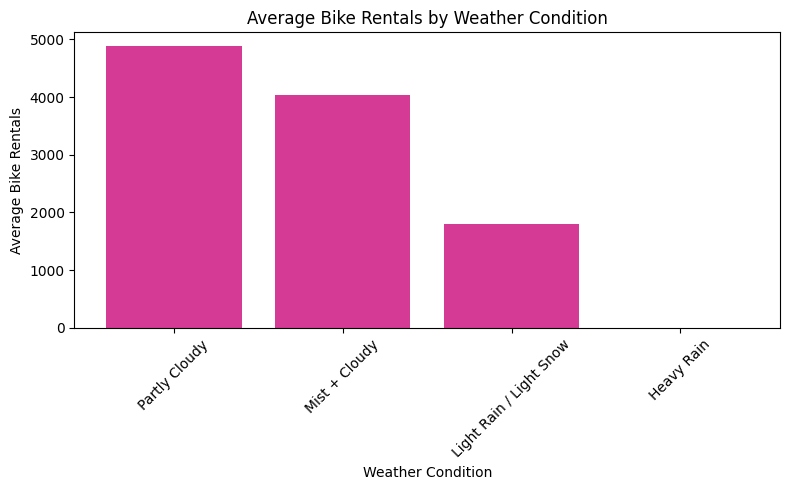

In [46]:
# Membuat bar chart dari tabel kondisi cuaca dan rata-rata peminjaman sepeda
plt.figure(figsize=(8, 5))
plt.bar(weather_avg_complete['Weather Condition'], weather_avg_complete['Average Bike Rentals'], color='#D53A94')

# Menambahkan judul dan label pada sumbu
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Bike Rentals')

# Rotasi label x-axis untuk tampilan yang lebih baik
plt.xticks(rotation=45)

# Menampilkan chart
plt.tight_layout()
plt.show()

**Insight**
- Dapat kita lihat bahwa peminjaman sepeda paling banyak terjadi pada cuaca "Partly cloudy" dan terus menurun hingga "Heavy Rain" yang sama sekali tidak ada yang meminjam. Jadi peminjaman sepeda juga sangat terpengaruh oleh cuaca.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1 : Peminjaman sepeda terus mengalami peningkatan dengan adanya sedikit penurunan pada akhir tahun. Puncaknya ada pada sekitar bulan 9 tahun 2012.
- Conclution pertanyaan 2 : Cuaca sangat mempengaruhi jumlah peminjaman sepeda. Semakin buruk cuaca, semakin sedikit jumlah peminjam sepeda.